In [8]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
# Load the CSV data from the GitHub link
url = 'https://raw.githubusercontent.com/FilipJanikulaS22660/ASI_grupa_6/main/data/prepared_data_obesity.csv'

data = pd.read_csv(url, sep=',')
print(data.columns)

Index(['Height', 'Weight', 'family_history_with_overweight', 'SCC',
       'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z', 'CAEC_minmax',
       'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax',
       'NObeyesdad'],
      dtype='object')


In [3]:
data.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [4]:
# Check how many records are null
null_counts = pd.DataFrame(data[data.select_dtypes('number').columns].isna().sum(), columns=['Null Counts'])
null_counts

,Null Counts
Height,0
Weight,0
family_history_with_overweight,0
SCC,0
MTRANS_Walking,0
FAVC_z,0
FCVC_minmax,0
NCP_z,0
CAEC_minmax,0
CH2O_minmax,0


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

In [9]:
features = ['Height', 'Weight', 'family_history_with_overweight', 'SCC',
       'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z', 'CAEC_minmax',
       'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax']

target = ["NObeyesdad"]

data_x = data[features]
data_y = data[target]

print(np.unique(data_y))

print(data_x.head())

[0 1 2 3 4 5 6]
   Height  Weight  family_history_with_overweight  SCC  MTRANS_Walking  \
0    1.62    64.0                               1    0               0   
1    1.52    56.0                               1    1               0   
2    1.80    77.0                               1    0               0   
3    1.80    87.0                               0    0               1   
4    1.78    89.8                               0    0               0   

     FAVC_z  FCVC_minmax     NCP_z  CAEC_minmax  CH2O_minmax  FAF_minmax  \
0  2.766876          0.5  0.404704     0.333333          0.5    0.000000   
1  2.766876          1.0  0.404704     0.333333          1.0    1.000000   
2  2.766876          0.5  0.404704     0.333333          0.5    0.666667   
3  2.766876          1.0  0.404704     0.333333          0.5    0.666667   
4  2.766876          0.5  2.164116     0.333333          0.5    0.000000   

      TUE_z    CALC_z  Age_bin_minmax  
0  0.550985  1.439033            0.25  
1 

Text(0.5, 1.0, 'Analiza korelacji')

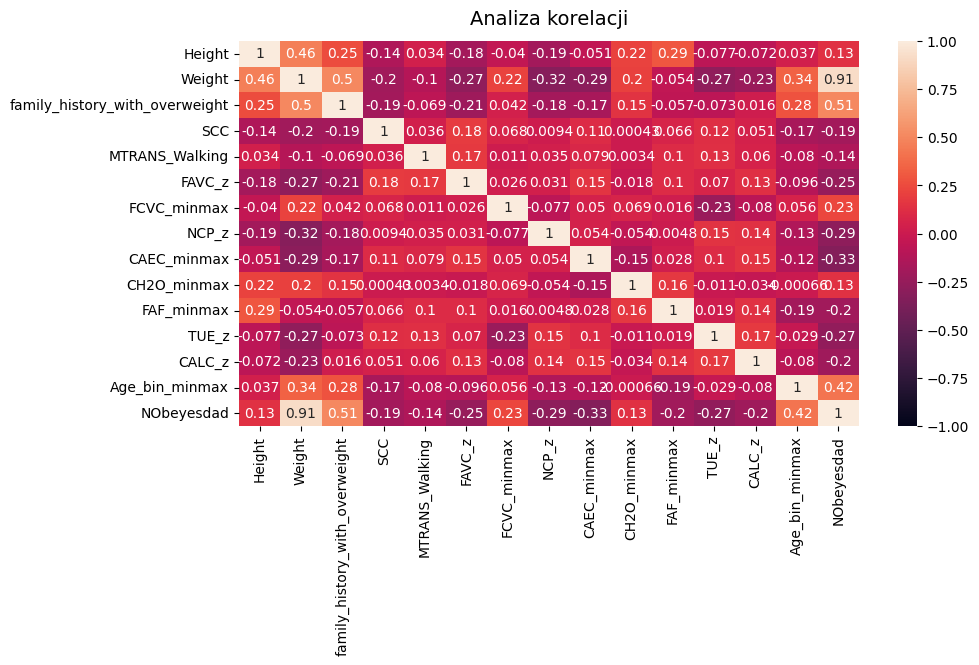

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Analiza korelacji", fontdict={"fontsize": 14}, pad=12)

In [12]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_x = std_scaler.fit_transform(data_x)

data_x.shape

(2086, 14)

In [17]:
from sklearn.model_selection import train_test_split

(train_x, test_x, train_y, test_y) = train_test_split(data_x, data_y, test_size = .1, random_state=42)

print("train x size: ", train_x.shape)
print("train y size: ", train_y.shape)
print("test x size: ", test_x.shape)
print("test y size: ", test_y.shape)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_x, train_y)

train x size:  (1877, 14)
train y size:  (1877, 1)
test x size:  (209, 14)
test y size:  (209, 1)


<ipython-input-17-2d3e87f5f333>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(train_x, train_y)
lin_model.score(test_x, test_y)

0.9608913549825917

In [21]:
pred_y = model.predict(test_x)

# Evaluate the model's performance
print("Precision:", accuracy_score(test_y, pred_y))
print("Classification report:\n", classification_report(test_y, pred_y))

# Analyze feature importance
importances = model.feature_importances_
feature_names = data.columns
# feature_importances = pd.Series(importances, index=feature_names)
# feature_importances.sort_values(ascending=False, inplace=True)
# print("Feature Importances:\n", feature_importances)

Precision: 0.9521531100478469
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.78      0.97      0.86        33
           2       0.96      0.86      0.91        29
           3       1.00      1.00      1.00        19
           4       1.00      0.92      0.96        38
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        31

    accuracy                           0.95       209
   macro avg       0.96      0.95      0.96       209
weighted avg       0.96      0.95      0.95       209

